# **Task 1 - Preprocess and Explore the Data**


## 1. Fetch Historical Data

Using **_yfinance_** to download data for **TSLA**, **BND**, and **SPY** from July 1, 2015, to July 31, 2025.


In [14]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

# Download data for all tickers at once, which returns a multi-level column DataFrame
data_multi = yf.download(tickers, start=start_date,
                         end=end_date, auto_adjust=True)

# Create a dictionary of DataFrames, one for each ticker, with flattened columns
data = {ticker: data_multi.xs(ticker, level=1, axis=1) for ticker in tickers}

for ticker, df in data.items():
    df.to_csv(f'../data/{ticker}_historical.csv')

display(data['TSLA'].head(), data['BND'].head(), data['SPY'].head())

[*********************100%***********************]  3 of 3 completed



Price,Close,High,Low,Open,Volume
Date,,,,,
2015-07-01,17.943333,18.174667,17.856667,18.073999,31518000
2015-07-02,18.667999,18.830000,18.220667,18.680000,107458500
2015-07-06,18.648001,18.779333,18.420000,18.591999,61828500
2015-07-07,17.858667,18.346666,17.384666,18.333332,91576500
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-07-01,60.816692,60.914418,60.764070,60.794141,5399300
2015-07-02,60.967079,61.027221,60.937008,60.937008,1060100
2015-07-06,61.177605,61.222714,61.057327,61.222714,2210700
2015-07-07,61.237720,61.470762,61.237720,61.410626,4183200
2015-07-08,61.410648,61.463271,61.312917,61.373058,1967800


Price,Close,High,Low,Open,Volume
Date,,,,,
2015-07-01,174.917099,175.363874,174.124701,175.110979,135979900
2015-07-02,174.756958,175.566219,174.335471,175.397627,104373700
2015-07-06,174.259567,175.043527,173.256426,173.458745,117975400
2015-07-07,175.355438,175.481879,172.059407,174.461888,173820200
2015-07-08,172.413483,174.293311,172.177451,174.006703,164020100


## 2. Data Cleaning and Understanding

- Check stats, data types, missing values.
- Handle missing values (e.g., forward-fill for weekends/holidays).
- Ensure time-based indexing.


In [15]:
from sklearn.preprocessing import MinMaxScaler

# Combine 'Close' prices into a single DataFrame, ensuring no empty frames are included
closing_prices = pd.DataFrame(
    {ticker: data[ticker]['Close'] for ticker in tickers if not data[ticker].empty})

# Drop rows with any NaN values to align the time series data across all tickers
closing_prices.dropna(inplace=True)

if closing_prices.empty:
    print("No valid closing price data available for the selected tickers and date range.")
else:
    # Basic statistics
    stats = closing_prices.describe()
    print(stats)

    # Data types and missing values
    print(closing_prices.info())
    print(closing_prices.isnull().sum())

    # Handle missing values (if any, e.g., due to holidays)
    closing_prices = closing_prices.ffill()  # Forward fill

    # Normalize/Scale if needed (for ML later; optional now)
    scaler = MinMaxScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(
        closing_prices), columns=closing_prices.columns, index=closing_prices.index)
    display(scaled_data.head())

              TSLA          BND          SPY
count  2535.000000  2535.000000  2535.000000
mean    131.963002    68.469189   334.193733
std     120.914904     4.554601   126.427704
min       9.578000    60.779144   155.869781
25%      18.967667    64.654339   230.083191
50%      94.571335    67.604866   305.264435
75%     236.761665    71.891136   420.350464
max     479.859985    77.318245   637.099976
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    2535 non-null   float64
 1   BND     2535 non-null   float64
 2   SPY     2535 non-null   float64
dtypes: float64(3)
memory usage: 79.2 KB
None
TSLA    0
BND     0
SPY     0
dtype: int64


,TSLA,BND,SPY
Date,,,
2015-07-01,0.017788,0.002270,0.039580
2015-07-02,0.019329,0.011363,0.039248
2015-07-06,0.019286,0.024092,0.038214
2015-07-07,0.017608,0.027727,0.040491
2015-07-08,0.015776,0.038182,0.034378


## 3. Exploratory Data Analysis (EDA)

- Visualize closing prices.
- Daily percentage changes (returns).
- Rolling volatility.
- Outlier detection.
- Stationarity test (ADF).
- Risk metrics (VaR, Sharpe).


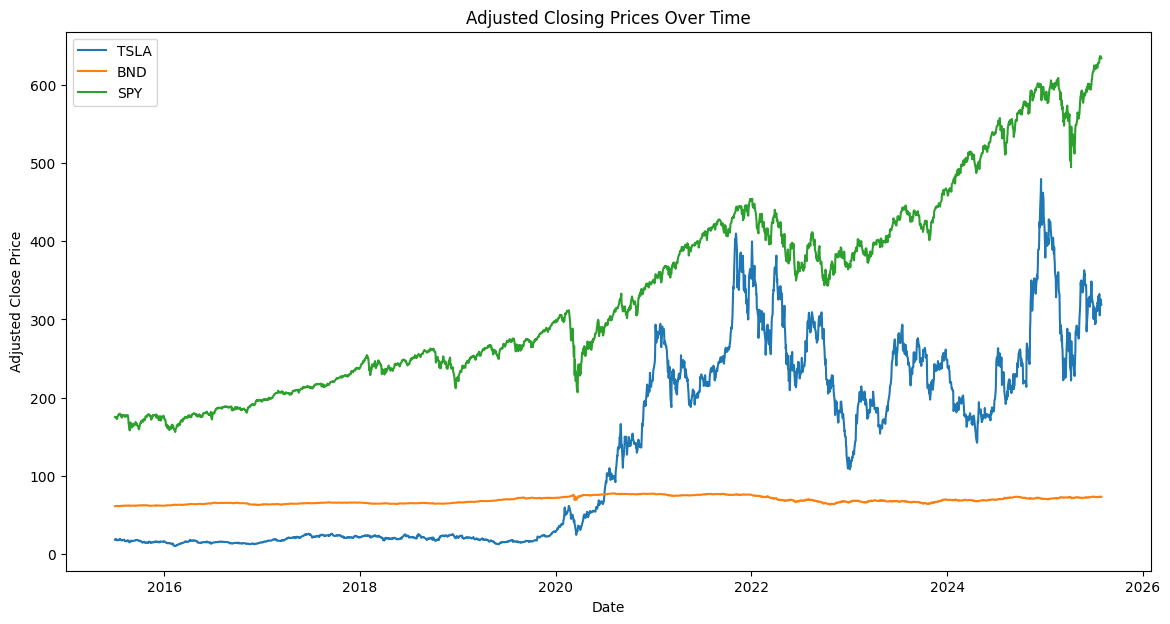

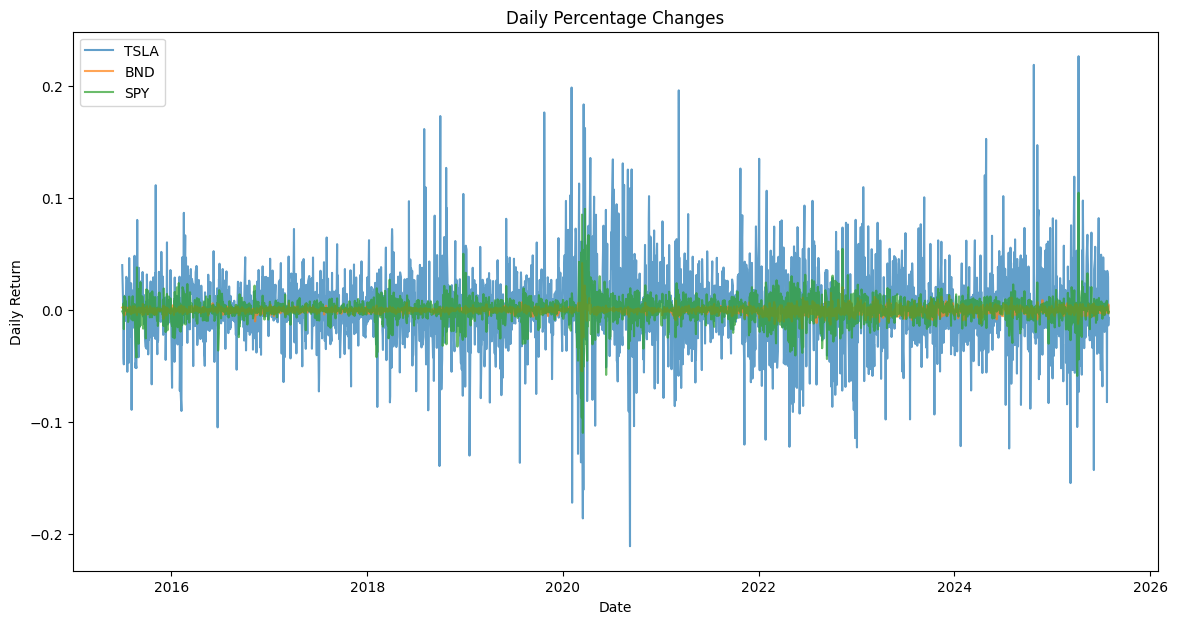

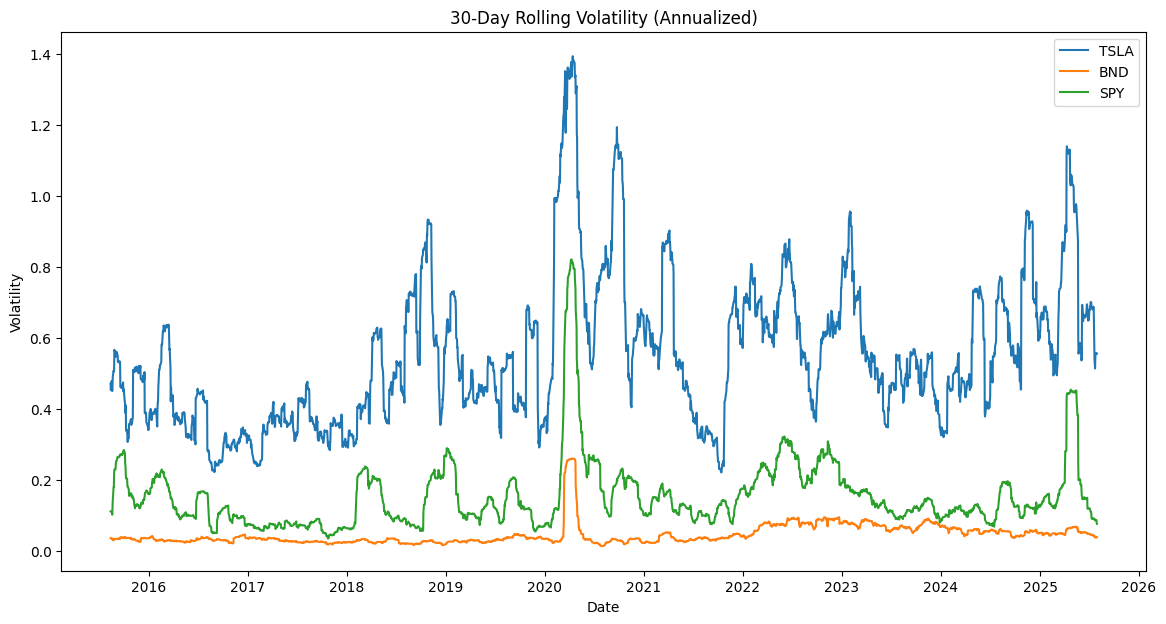

Outliers:\n                 TSLA       BND       SPY
Date                                    
2015-08-24       NaN       NaN -0.042107
2015-08-26       NaN       NaN  0.038394
2016-06-24       NaN       NaN -0.035909
2018-02-05       NaN       NaN -0.041822
2018-02-08       NaN       NaN -0.037509
...              ...       ...       ...
2025-04-04       NaN       NaN -0.058543
2025-04-07       NaN -0.012056       NaN
2025-04-09  0.226900       NaN  0.105019
2025-04-10       NaN       NaN -0.043819
2025-06-05 -0.142599       NaN       NaN

[84 rows x 3 columns]
TSLA Closing Prices ADF: p-value = 0.5731959514207239 (Stationary if <0.05)
TSLA Closing Prices ADF: p-value = 0.5731959514207239 (Stationary if <0.05)
TSLA Daily Returns ADF: p-value = 0.0
TSLA Daily Returns ADF: p-value = 0.0
BND Closing Prices ADF: p-value = 0.5155090269962105 (Stationary if <0.05)
BND Closing Prices ADF: p-value = 0.5155090269962105 (Stationary if <0.05)
BND Daily Returns ADF: p-value = 3.58310381898362e-17


In [17]:
# Visualize closing prices
from statsmodels.tsa.stattools import adfuller
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(closing_prices[ticker], label=ticker)
plt.title('Adjusted Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.show()

# Daily returns
daily_returns = closing_prices.pct_change().dropna()
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(daily_returns[ticker], label=ticker, alpha=0.7)
plt.title('Daily Percentage Changes')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.show()

# Rolling volatility (30-day std dev of returns)
rolling_vol = daily_returns.rolling(
    window=30).std() * (252 ** 0.5)  # Annualized
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(rolling_vol[ticker], label=ticker)
plt.title('30-Day Rolling Volatility (Annualized)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Outlier detection (e.g., returns beyond 3 std dev)
outliers = daily_returns[abs(daily_returns) > 3 * daily_returns.std()]
print("Outliers:\\n", outliers.dropna(how='all'))

# Stationarity test (ADF on closing prices and returns)

for ticker in tickers:
    if ticker in closing_prices.columns:
        adf_price = adfuller(closing_prices[ticker])
        print(
            f"{ticker} Closing Prices ADF: p-value = {adf_price[1]} (Stationary if <0.05)")
    if ticker in daily_returns.columns:
        adf_returns = adfuller(daily_returns[ticker])
        print(f"{ticker} Daily Returns ADF: p-value = {adf_returns[1]}")

# Risk metrics for a valid ticker (e.g., the first one)
if not daily_returns.empty:
    example_ticker = daily_returns.columns[0]
    example_returns = daily_returns[example_ticker]
    sharpe_ratio = (example_returns.mean() / example_returns.std()
                    ) * (252 ** 0.5)  # Assuming risk-free rate=0
    var_95 = example_returns.quantile(0.05)  # Historical VaR at 95%
    print(f"\\n--- Risk Metrics for {example_ticker} ---")
    print(f"Sharpe Ratio: {sharpe_ratio}")
    print(f"Value at Risk (95%): {var_95}")